# Assignment-2
Due date: Oct. 3

In this assignment, you are working at a hypothetical bank called `InvRes` Bank offering consulting service to its customers. Your first aim is to find out the risk level of these stocks relative to the market index.



To accomplish this task, you will use Capital Asset Pricing Model (CAPM), which dates back to 1960’s, yet still powerful tool in finance due to its intuitive and easy-to-apply nature. As it is completely white-box model, it makes it easy to understand and explain. 

Once you estimate the slope coefficient (beta) and intercept term (alpha) of the CAPM model, you will be able to assess if the asset is risky compared to market. Then, your next task is to find out the stock with best risk-return relationship. To do that, you are required to employ the following ratios:

• Sharpe ratio

• Treynor ratio

You can pick any two stocks and market index other than those we have in the class.

This assignment will be divided into 4 milestones.

1. Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. (25 pts)

2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. (25 pts)

3. Run Capital Asset Pricing Model and interpret the results. (25 pts)

4. Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude. (25 pts)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
! pip install yfinance

In [4]:
stocks = ['NFLX','PYPL','^GSPC']
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,4,1)
stock_price = yf.download(stocks,start=start,end = end,interval='1d')

[*********************100%***********************]  3 of 3 completed


In [5]:
stock_price.head()

Adj Close                                Close              \
                  NFLX        PYPL        ^GSPC        NFLX        PYPL   
Date                                                                      
2021-01-04  522.859985  231.919998  3700.649902  522.859985  231.919998   
2021-01-05  520.799988  234.910004  3726.860107  520.799988  234.910004   
2021-01-06  500.489990  226.830002  3748.139893  500.489990  226.830002   
2021-01-07  508.890015  235.039993  3803.790039  508.890015  235.039993   
2021-01-08  510.399994  242.460007  3824.679932  510.399994  242.460007   

                               High                                  Low  \
                  ^GSPC        NFLX        PYPL        ^GSPC        NFLX   
Date                                                                       
2021-01-04  3700.649902  540.799988  237.996994  3769.989990  515.090027   
2021-01-05  3726.860107  526.780029  235.639999  3737.830078  515.890015   
2021-01-06  3748.139893  513.099976  232.490005  3783.040039  499.500000   
2021-01-07  3803.790039  516.440002  235.600006  3811.550049  506.420013   
2021-01-08  3824.679932  513.239990  242.910004  3826.689941  504.510010   

                                           Open                           \
                  PYPL        ^GSPC        NFLX        PYPL        ^GSPC   
Date                                                                       
2021-01-04  227.535004  3662.709961  539.000000  237.800003  3764.610107   
2021-01-05  229.800003  3695.070068  521.549988  230.470001  3698.020020   
2021-01-06  225.701996  3705.340088  511.970001  228.940002  3712.199951   
2021-01-07  229.220001  3764.709961  508.279999  229.460007  3764.709961   
2021-01-08  236.069000  3783.600098  511.309998  237.429993  3815.050049   

             Volume                       
               NFLX     PYPL       ^GSPC  
Date                                      
2021-01-04  4444400  8148700  5006680000  
2021-01-05  3133900  5047800  4582620000  
2021-01-06  5346200  9211700  6049970000  
2021-01-07  3686400  7107900  5080870000  
2021-01-08  2973900  6767700  4764180000

In [6]:
stock_price = stock_price['Close']

In [7]:
stock_price.head()

,NFLX,PYPL,^GSPC
Date,,,
2021-01-04,522.859985,231.919998,3700.649902
2021-01-05,520.799988,234.910004,3726.860107
2021-01-06,500.489990,226.830002,3748.139893
2021-01-07,508.890015,235.039993,3803.790039
2021-01-08,510.399994,242.460007,3824.679932


In [8]:
stock_price.describe()

,NFLX,PYPL,^GSPC
count,61.000000,61.000000,61.000000
mean,530.436068,252.514509,3865.706899
std,22.795208,19.487768,71.221421
min,493.329987,226.089996,3700.649902
25%,511.290009,239.050003,3811.149902
50%,524.030029,244.899994,3875.439941
75%,548.219971,265.000000,3915.590088
max,586.340027,304.790009,3974.540039


In [9]:
stock_price = stock_price.rename({'^GSPC' :'GSPC'},  axis='columns')

In [10]:
stock_price.head()

,NFLX,PYPL,GSPC
Date,,,
2021-01-04,522.859985,231.919998,3700.649902
2021-01-05,520.799988,234.910004,3726.860107
2021-01-06,500.489990,226.830002,3748.139893
2021-01-07,508.890015,235.039993,3803.790039
2021-01-08,510.399994,242.460007,3824.679932


In [12]:
!pip3 install fredapi

In [13]:
from fredapi import Fred
fred = Fred(api_key ='cd037e5c13d2e276da9d01df08b9c108') # my Api key 

In [14]:
fred.search('DGS3MO')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
DGS3MO,Daily,D,DGS3MO,2022-09-28 15:23:10-05:00,For further information regarding treasury con...,2022-09-27,1981-09-01,72,2022-09-28,2022-09-28,Not Seasonally Adjusted,NSA,Market Yield on U.S. Treasury Securities at 3-...,Percent,%


In [15]:
risk_free = fred.get_series('DGS3MO')
risk_free

1981-09-01    17.01
1981-09-02    16.65
1981-09-03    16.96
1981-09-04    16.64
1981-09-07      NaN
              ...  
2022-09-21     3.31
2022-09-22     3.29
2022-09-23     3.24
2022-09-26     3.39
2022-09-27     3.35
Length: 10716, dtype: float64

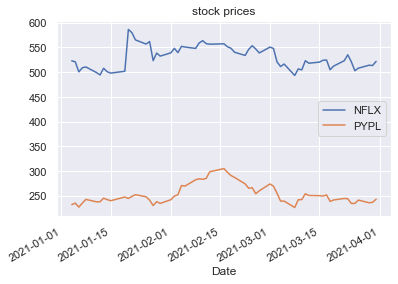

In [19]:
stock_price.loc[:,['NFLX','PYPL']].plot()
plt.title('stock prices')
plt.xlabel('Date')
plt.show()


In [20]:
stock_price.corr()

,NFLX,PYPL,GSPC
NFLX,1.000000,0.621473,0.186057
PYPL,0.621473,1.000000,0.437677
GSPC,0.186057,0.437677,1.000000


In [21]:
returns = stock_price.pct_change()
returns.dropna(inplace=True)

In [23]:
risk_free = risk_free['2021-01-01':'2021-04-01']
risk_free = risk_free/90 
risk_free.dropna(inplace=True)

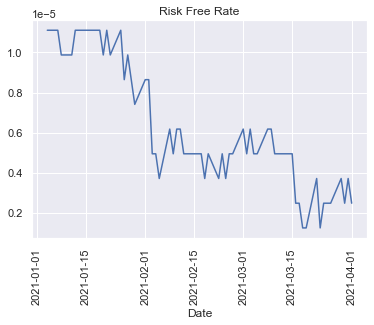

In [24]:
plt.plot(risk_free)
plt.title('Risk Free Rate')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

In [25]:
returns.columns

Index(['NFLX', 'PYPL', 'GSPC'], dtype='object')

In [26]:
for i in returns.columns:
    returns[f'excess_return_{i}'] = returns[i] - risk_free

In [27]:
returns.head()

,NFLX,PYPL,GSPC,excess_return_NFLX,excess_return_PYPL,excess_return_GSPC
Date,,,,,,
2021-01-05,-0.003940,0.012892,0.007083,-0.003951,0.012881,0.007071
2021-01-06,-0.038998,-0.034396,0.005710,-0.039009,-0.034407,0.005699
2021-01-07,0.016784,0.036194,0.014847,0.016772,0.036183,0.014836
2021-01-08,0.002967,0.031569,0.005492,0.002957,0.031559,0.005482
2021-01-11,-0.022139,-0.020457,-0.006555,-0.022149,-0.020467,-0.006565


Running CAPM

In [28]:
import statsmodels.api as sm

In [36]:
y_nflx = returns['excess_return_NFLX']
X = returns['excess_return_GSPC']


In [37]:
y_nflx.head() 

Date
2021-01-05   -0.003951
2021-01-06   -0.039009
2021-01-07    0.016772
2021-01-08    0.002957
2021-01-11   -0.022149
Name: excess_return_NFLX, dtype: float64

In [38]:
X.head()

Date
2021-01-05    0.007071
2021-01-06    0.005699
2021-01-07    0.014836
2021-01-08    0.005482
2021-01-11   -0.006565
Name: excess_return_GSPC, dtype: float64

In [42]:
X = sm.add_constant(X, prepend=False)
X.head()

,excess_return_GSPC,const
Date,,
2021-01-05,0.007071,1.0
2021-01-06,0.005699,1.0
2021-01-07,0.014836,1.0
2021-01-08,0.005482,1.0
2021-01-11,-0.006565,1.0


In [45]:
capm_nflx = sm.OLS(y_nflx,X)
capm_nflx
capm_result_nflx = capm_nflx.fit()

In [46]:
capm_result_nflx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_NFLX   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     23.92
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           8.34e-06
Time:                        23:09:38   Log-Likelihood:                 135.24
No. Observations:                  60   AIC:                            -266.5
Df Residuals:                      58   BIC:                            -262.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.6674      0.341      4.891      0.000       0.985       2.350
const                 -0.0017      0.003     -0.492      0.625      -0.008       0.005
==============================================================================
Omnibus:                       69.692   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              758.494
Skew:                           3.083   Prob(JB):                    1.97e-165
Kurtosis:                      19.290   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) from above we can say that as p value is equal to zero we can reject the null hypothesis and can say that there is relation between excess return of netfix and excess return of market which is S&P 500.
2) from above we have beta magnitude of 1.6674 from which we can say that for every  1-unit increase in S&P-500 results in an increase of 1.6674 in Netflix return.
3) We have R-squared value as 0.292 which indicates that excess return of S & P 500 explains only 29.2% of changes in the dependent variable which is execess return of netflix.

In [59]:
y_pypl = returns['excess_return_PYPL']
X = returns['excess_return_GSPC']


In [60]:
X = sm.add_constant(X, prepend=False)
X.head()

,excess_return_GSPC,const
Date,,
2021-01-05,0.007071,1.0
2021-01-06,0.005699,1.0
2021-01-07,0.014836,1.0
2021-01-08,0.005482,1.0
2021-01-11,-0.006565,1.0


In [61]:
capm_pypl = sm.OLS(y_pypl,X)
capm_result_pypl = capm_pypl.fit()

In [62]:
capm_result_pypl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_PYPL   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     57.27
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           3.25e-10
Time:                        23:54:59   Log-Likelihood:                 143.98
No. Observations:                  60   AIC:                            -284.0
Df Residuals:                      58   BIC:                            -279.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     2.2302      0.295      7.568      0.000       1.640       2.820
const                 -0.0015      0.003     -0.514      0.609      -0.007       0.004
==============================================================================
Omnibus:                        0.527   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.644
Skew:                          -0.050   Prob(JB):                        0.725
Kurtosis:                       2.502   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) from above we can say that as p value is equal to zero we can reject the null hypothesis and can say that there is relation between excess return of paypal and excess return of market which is S&P 500.
2) from above we have beta magnitude of 1.6674 from which we can say that for every  1-unit increase in S&P-500 results in an increase of 2.2302 in paypal return.
3) We have R-squared value as 0.292 which indicates that excess return of S & P 500 explains only 49.97% of changes in the dependent variable which is execess return of paypal.

## Compare the Performance

In [64]:
import matplotlib.pyplot as plt

In [65]:
betas = [capm_result_nflx.params[0],
         capm_result_pypl.params[0]]
betas

[1.6673774332796902, 2.2301990542591077]

In [66]:
def SML(rf, ret, beta):
    asset_ret = [rf + (rm - rf) * i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel('Asset Beta')
    plt.ylabel('Asset Return')
    plt.title('SML')
    plt.plot(1, ret, 'ro')

In [67]:
rf = risk_free.mean()
rm = returns['GSPC'].mean()

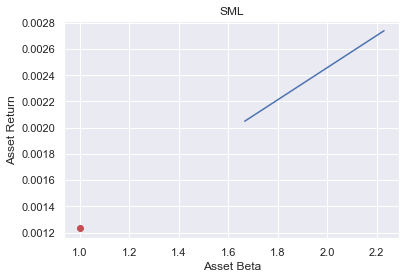

In [68]:
SML(rf,rm,betas)

Given the beta, if the stock locates below the SML, this implies that stock has a higher return per unit of risk assumed. Hence, it can be concluded that the stock is overvalued and decide to sell the stock. Conversely, if the stock locates above the SML, stock has a lower return per unit of risk assumed, which is considered to be undervalued and buying a stock would be wise choice. 

## sharp ratio

In [71]:
def sharpe(stocks,rf,n_assets):
    sharpe_ratios = {}
    for i,j in zip(stocks,range(n_assets)):
        sharpe_ratios[i] = returns.iloc[:,j].mean()-rf/np.std(returns.iloc[:,j])
    return sharpe_ratios

In [82]:
stocks = returns.columns[:2]
sharpe_ratios=sharpe(stocks,rf,2)
sharpe_ratios

{'NFLX': 0.00019005307450175517, 'PYPL': 0.0010435070478811896}

from above we can see that the sharpe ratio for paypal is greater so we can say that investment in paypal is advisable considering the risk

## Treynor ratio

In [75]:
df_betas = pd.DataFrame(betas)

In [77]:
df_betas.columns = ['betas']

In [79]:
df_betas.index = returns.columns[:2]

In [80]:
df_betas

,betas
NFLX,1.667377
PYPL,2.230199


In [81]:
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    for i, j in enumerate(stocks):
        treynor_ratios[j] = returns.iloc[:, i].mean() - rf / df_betas['betas'][j]
    return treynor_ratios

In [83]:
treynor(stocks, rf, 2)

{'NFLX': 0.00039341154838743944, 'PYPL': 0.0012426909779305049}

from treynor ratio aslo we can see that paypal has highest value so we can consider that it is advisable to invest on paypal.